# Data Preprocessing

## Agenda

1. Introduction to Preprocessing
2. StandardScaler
3. MinMaxScaler
4. RobustScaler
5. Normalization
6. Binarization
7. Encoding Categorical (Ordinal & Nominal) Features
8. Imputation
9. Polynomial Features
10. Custom Transformer
11. Text Processing
12. CountVectorizer
13. TfIdf
14. HashingVectorizer
15. Image using skimage

## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning
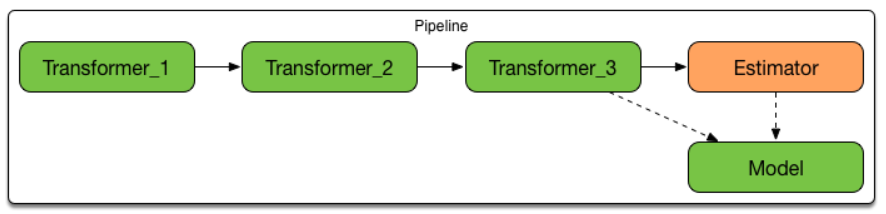

## 2. StandardScaler

Standardization is a preprocessing method used to transform continuous data to make it look normally distributed.

In scikit-learn, this is often a necessary step, because many models assume that the data you are training on is normally distributed, and if it isn't, you risk biasing your model. 

* The StandardScaler assumes your data is normally distributed (continuous numerical data) within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation


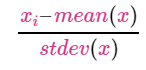

When to standardize:
* Models in linear space
* Dataset features have high variance 
* If data is not normally distributed, this is not the best scaler to use.

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
#Generating normally distributed data
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

<AxesSubplot:ylabel='Density'>

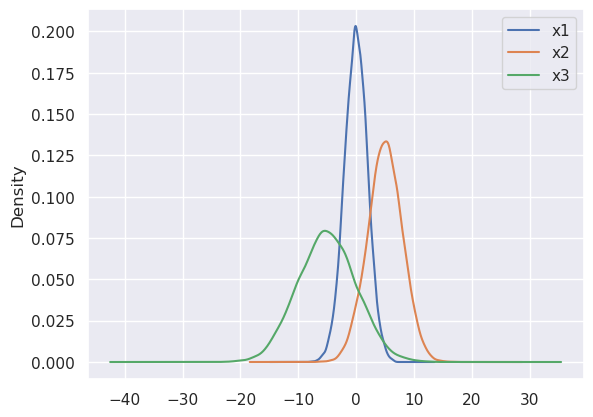

In [101]:
# plotting data
df.plot.kde()

In [102]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [103]:
data_tf = ss.fit_transform(df)

In [104]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

<AxesSubplot:ylabel='Density'>

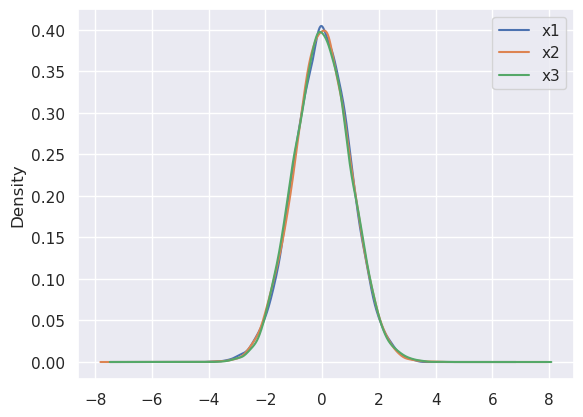

In [105]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




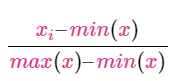


* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [106]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

<AxesSubplot:ylabel='Density'>

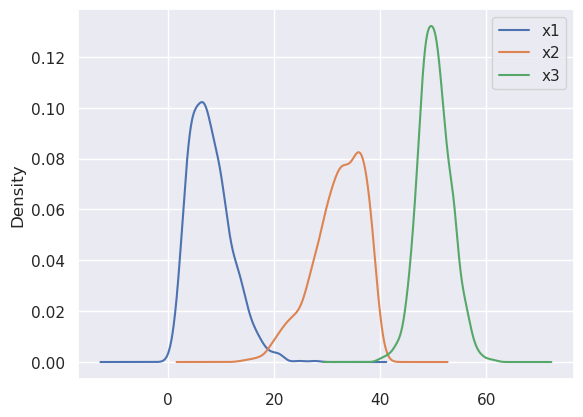

In [107]:
df.plot.kde()

In [108]:
from sklearn.preprocessing import MinMaxScaler 

In [109]:
mm = MinMaxScaler()

In [110]:
data_tf = mm.fit_transform(df)

In [111]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])

<AxesSubplot:ylabel='Density'>

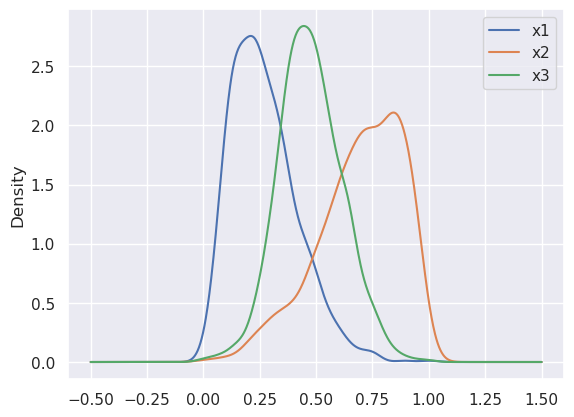

In [112]:
df.plot.kde()

# 4. Robust Scaler

* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile
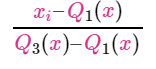

In [113]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x': np.concatenate([np.random.normal(20,1,1000), np.random.normal(1,1,25)]),
    'y': np.concatenate([np.random.normal(30,1,1000), np.random.normal(50,1,25)])
})

<AxesSubplot:ylabel='Density'>

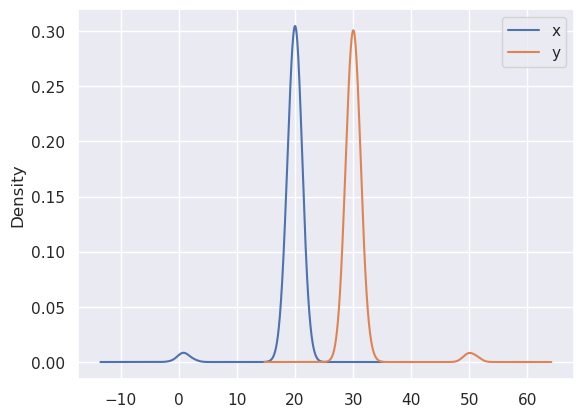

In [114]:
df.plot.kde()

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude

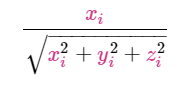
* Centralizes data to origin 

In [115]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

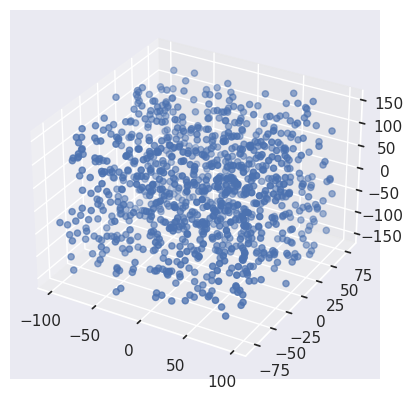

In [116]:
figure = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1,df.y1,df.z1)

In [117]:
from sklearn.preprocessing import Normalizer

In [118]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [119]:
df = pd.DataFrame(data_tf,columns = ['x1','y1','z1'])

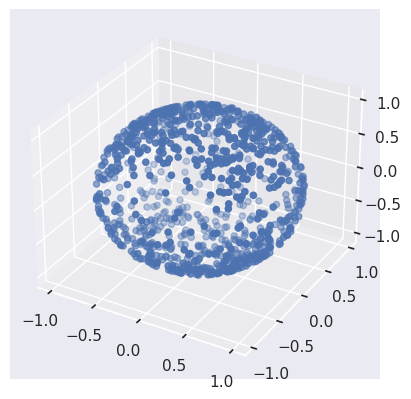

In [120]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1,df.y1,df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [121]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [122]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [123]:
data_tf = binarizer.fit_transform(X)

In [124]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [125]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [126]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [127]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

## Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [128]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [129]:
df

,Age,Gender
0,33,Male
1,44,Female
2,22,Male
3,44,Female
4,55,Male
5,22,Male


In [130]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [131]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [132]:
le = LabelEncoder()
df['gender_transtf'] = le.fit_transform(df.Gender)

In [133]:
df

,Age,Gender,gender_transtf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [134]:
OneHotEncoder().fit_transform(df[['gender_transtf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 8. Imputation
* Missing values cannot be processed by learning algorithms

* Imputers can be used to infer value of missing data from existing data

In [135]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [136]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

In [137]:
imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

## 9. Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with polynomial regression to learn model of higher degree

In [138]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [139]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [140]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

## 10. Custom Transformer 
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer 
* validate = False, is required for string columns

In [141]:
from sklearn.preprocessing import FunctionTransformer

In [142]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] *2
    return x

In [143]:
customtransformer = FunctionTransformer(mapping,validate= False)

In [144]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })

In [145]:
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [146]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


# 11. Text Processing
* Perhaps one of the most common information
* Learning algorithms don't understand text but only numbers
* Below menthods convert text to numbers

## 12. CountVectorizer
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

#### Hyperparameters
* n_grams - Number of words considered for each column
* stop_words - words not considered
* vocabulary - only words considered

In [147]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [148]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [149]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]])

In [150]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [151]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]])

In [152]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}

In [153]:
cv =  CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]])

In [154]:
cv

CountVectorizer(vocabulary=['mission', 'food', 'second'])

In [155]:
cv = CountVectorizer(ngram_range=[1,3])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1]])

In [156]:
cv.vocabulary_

{'this': 42,
 'is': 13,
 'the': 30,
 'first': 8,
 'document': 5,
 'awesome': 3,
 'food': 11,
 'this is': 43,
 'is the': 16,
 'the first': 31,
 'first document': 9,
 'document awesome': 6,
 'awesome food': 4,
 'this is the': 44,
 'is the first': 17,
 'the first document': 32,
 'first document awesome': 10,
 'document awesome food': 7,
 'second': 26,
 'the second': 35,
 'second second': 28,
 'second document': 27,
 'is the second': 18,
 'the second second': 36,
 'second second document': 29,
 'and': 0,
 'third': 39,
 'one': 23,
 'mission': 21,
 'impossible': 12,
 'and the': 1,
 'the third': 37,
 'third one': 40,
 'one the': 24,
 'the is': 33,
 'is mission': 14,
 'mission impossible': 22,
 'and the third': 2,
 'the third one': 38,
 'third one the': 41,
 'one the is': 25,
 'the is mission': 34,
 'is mission impossible': 15,
 'is this': 19,
 'this the': 45,
 'is this the': 20,
 'this the first': 46}

## 13. TfId fVectorizer
TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [159]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [160]:
vectorizer.get_feature_names()

/home/nsl47/anaconda3/envs/bd/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['awesome', 'document', 'food', 'impossible', 'mission', 'second']

## 14. HashingVectorizer
* All above techniques converts data into table where each word is converted to column
* Learning on data with millions of columns is difficult to process
* HashingVectorizer is an useful technique for out-of-core learning
* Multiple words are hashed to limited column
* Limitation - Hashed value to word mapping is not possible

In [161]:
from sklearn.feature_extraction.text import HashingVectorizer
hv  = HashingVectorizer(n_features = 5)

In [162]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

## 15. Image Processing using skimage
* skimage doesn't come with anaconda. install with 'pip install skimage'
* Images should be converted from 0-255 scale to 0-1 scale.
* skimage takes image path & returns numpy array
* images consist of 3 dimension


In [7]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [6]:
from skimage.io import imread,imshow

In [13]:
image = imread('w.jpg')

In [14]:
image.shape

(1200, 1920, 3)

In [15]:
image[0]

array([[ 82, 202, 218],
       [ 80, 200, 216],
       [ 78, 198, 214],
       ...,
       [ 91, 198, 214],
       [ 90, 197, 213],
       [ 89, 196, 212]], dtype=uint8)

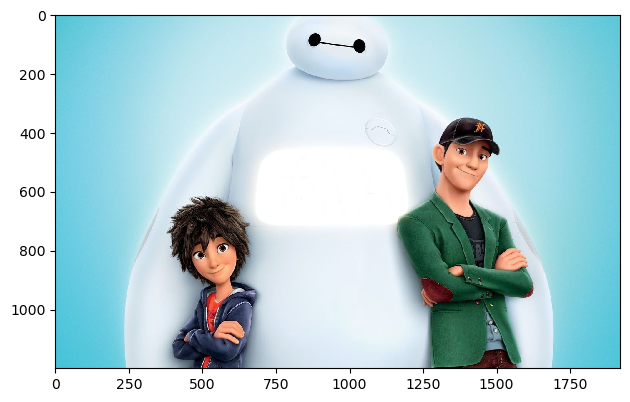

In [16]:
imshow(image)

In [17]:
from skimage.color import rgb2gray

In [18]:
rgb2gray(image).shape

(1200, 1920)

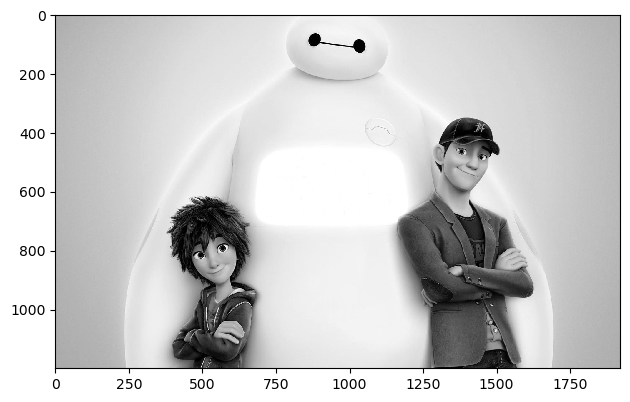

In [19]:
imshow(rgb2gray(image))

In [20]:
from skimage.transform import resize

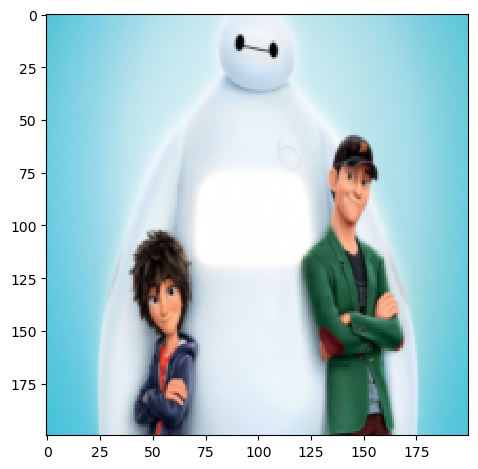

In [21]:
imshow(resize(image,(200,200)))